In [70]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from city_sustainability.quality import life_quality
from city_sustainability.models import unet_model
from tensorflow.keras.callbacks import EarlyStopping
from city_sustainability.preprocessing import image_resize
from city_sustainability.loading_data import loading_paths, image_and_label_arrays

In [20]:
# Retrieve image_paths and label_paths
data_path_1 = '../../raw_data/OpenEarthMap_wo_xBD'
image_paths, label_paths = loading_paths(data_path_1)

In [21]:
# Check length of image_paths
len(image_paths)

2687

In [22]:
# Check length of label_paths
len(label_paths)

2687

In [54]:
# Import all image array as X and label array as y
X, y = image_and_label_arrays(image_paths, label_paths, sampling_ratio=0.50)

In [55]:
# Apply holdout
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [56]:
# Scale X and y
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [57]:
# Confirm shapes
X_train.shape
X_test.shape
y_train.shape
y_test.shape
X_train_scaled.shape
X_test_scaled.shape

(940, 256, 256, 3)

In [58]:
X_test.shape

(404, 256, 256, 3)

In [59]:
y_train.shape

(940, 256, 256, 9)

In [60]:
y_test.shape

(404, 256, 256, 9)

In [61]:
X_train_scaled.shape

(940, 256, 256, 3)

In [62]:
X_test_scaled.shape

(404, 256, 256, 3)

In [63]:
# Create the model
model = unet_model.build_vgg16_model(input_shape=(256, 256, 3), num_classes = 9)

In [64]:
# Compile the model

unet_model.compile_model(model)

In [ ]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=10)
# callbacks=[early_stopping])

In [65]:
# Train the model

unet_model.train_model(model, X_train_scaled, y_train, epochs = 100, batch_size=32, validation_split=0.2)

Epoch 1/100
24/24 [==============================] - 219s 9s/step - loss: 2.1827 - accuracy: 0.2721 - compute_iou: 0.1132 - val_loss: 3.8247 - val_accuracy: 0.3099 - val_compute_iou: 0.1832 - lr: 1.0000e-04
Epoch 2/100
24/24 [==============================] - 214s 9s/step - loss: 1.6985 - accuracy: 0.4133 - compute_iou: 0.1698 - val_loss: 3.5159 - val_accuracy: 0.3249 - val_compute_iou: 0.1894 - lr: 1.0000e-04
Epoch 3/100
24/24 [==============================] - 214s 9s/step - loss: 1.5441 - accuracy: 0.4599 - compute_iou: 0.1962 - val_loss: 2.9318 - val_accuracy: 0.3595 - val_compute_iou: 0.2078 - lr: 1.0000e-04
Epoch 4/100
24/24 [==============================] - 214s 9s/step - loss: 1.4677 - accuracy: 0.4827 - compute_iou: 0.2111 - val_loss: 2.2502 - val_accuracy: 0.4061 - val_compute_iou: 0.2274 - lr: 1.0000e-04
Epoch 5/100
24/24 [==============================] - 213s 9s/step - loss: 1.4134 - accuracy: 0.4968 - compute_iou: 0.2213 - val_loss: 1.8733 - val_accuracy: 0.4431 - val_co

24/24 [==============================] - ETA: 0s - loss: 1.1033 - accuracy: 0.5811 - compute_iou: 0.3035
Epoch 40: ReduceLROnPlateau reducing learning rate to 1e-05.
24/24 [==============================] - 212s 9s/step - loss: 1.1033 - accuracy: 0.5811 - compute_iou: 0.3035 - val_loss: 1.1021 - val_accuracy: 0.5887 - val_compute_iou: 0.3087 - lr: 1.0000e-04
Epoch 41/100
24/24 [==============================] - 212s 9s/step - loss: 1.0920 - accuracy: 0.5852 - compute_iou: 0.3043 - val_loss: 1.0912 - val_accuracy: 0.5914 - val_compute_iou: 0.3115 - lr: 1.0000e-05
Epoch 42/100
24/24 [==============================] - 213s 9s/step - loss: 1.0918 - accuracy: 0.5861 - compute_iou: 0.3053 - val_loss: 1.0839 - val_accuracy: 0.5925 - val_compute_iou: 0.3126 - lr: 1.0000e-05
Epoch 43/100
24/24 [==============================] - 213s 9s/step - loss: 1.0895 - accuracy: 0.5869 - compute_iou: 0.3054 - val_loss: 1.0847 - val_accuracy: 0.5919 - val_compute_iou: 0.3130 - lr: 1.0000e-05
Epoch 44/100
24

Epoch 79/100
24/24 [==============================] - 212s 9s/step - loss: 1.0753 - accuracy: 0.5913 - compute_iou: 0.3101 - val_loss: 1.0779 - val_accuracy: 0.5946 - val_compute_iou: 0.3162 - lr: 1.0000e-05
Epoch 80/100
24/24 [==============================] - 212s 9s/step - loss: 1.0801 - accuracy: 0.5895 - compute_iou: 0.3097 - val_loss: 1.0775 - val_accuracy: 0.5949 - val_compute_iou: 0.3166 - lr: 1.0000e-05
Epoch 81/100
24/24 [==============================] - 212s 9s/step - loss: 1.0782 - accuracy: 0.5909 - compute_iou: 0.3102 - val_loss: 1.0775 - val_accuracy: 0.5942 - val_compute_iou: 0.3162 - lr: 1.0000e-05
Epoch 82/100
24/24 [==============================] - 212s 9s/step - loss: 1.0805 - accuracy: 0.5888 - compute_iou: 0.3098 - val_loss: 1.0777 - val_accuracy: 0.5943 - val_compute_iou: 0.3168 - lr: 1.0000e-05
Epoch 83/100
24/24 [==============================] - 212s 9s/step - loss: 1.0804 - accuracy: 0.5900 - compute_iou: 0.3101 - val_loss: 1.0761 - val_accuracy: 0.5948 - v

In [66]:
model.save('../../model_training/marcel')

2023-05-25 06:15:35.498540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,?]
	 [[{{node inputs}}]]
2023-05-25 06:15:35.521676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,?]
	 [[{{node inputs}}]]
2023-05-25 06:15:35.706455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128,128,128]
	 [[{{node inputs}}]]
2023

INFO:tensorflow:Assets written to: ../../model_training/marcel/assets


INFO:tensorflow:Assets written to: ../../model_training/marcel/assets


In [153]:
# Evaluate the model

unet_model.evaluate_model(model, X_test_scaled, y_test)

13/13 [==============================] - 33s 3s/step - loss: 1.0854 - accuracy: 0.5872 - compute_iou: 0.3114


ValueError: too many values to unpack (expected 2)

In [169]:
X_train[0].shape

(256, 256, 3)

In [173]:
unet_model.predict(model, np.array(X_train[0]))

ValueError: in user code:

    File "/home/marcel/.pyenv/versions/3.8.12/envs/city_sustainability/lib/python3.8/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/home/marcel/.pyenv/versions/3.8.12/envs/city_sustainability/lib/python3.8/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/marcel/.pyenv/versions/3.8.12/envs/city_sustainability/lib/python3.8/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/home/marcel/.pyenv/versions/3.8.12/envs/city_sustainability/lib/python3.8/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/home/marcel/.pyenv/versions/3.8.12/envs/city_sustainability/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/marcel/.pyenv/versions/3.8.12/envs/city_sustainability/lib/python3.8/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_3" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(32, 256, 3)


In [71]:
import os
import PIL
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from PIL import ImageOps
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate

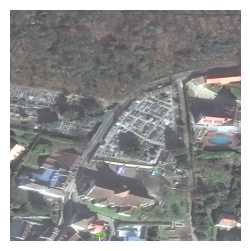

(650, 650, 3)

In [157]:
file_path = '../../raw_data/OpenEarthMap_wo_xBD/paris/images/paris_1.tif'
fig = plt.figure(figsize=(3, 3))
y_original = Image.open(file_path)
plt.axis('off')
plt.imshow(y_original)
plt.show()
y_original = np.array(y_original)
y_original.shape

In [158]:
lb = Image.open(file_path)
# Generate array for each label
# Resize each label using image_resize function
resized_label = image_resize(256,256,lb)
# Generate array for each image
numpy_array_image = np.array(resized_label)
# Encode labels
# encoded_label = to_categorical(numpy_array_label, num_classes=9)
# Add resized and encoded array to list
# label_list_array.append(encoded_label)

In [160]:
numpy_array_image.shape

(256, 256, 3)

In [165]:
from city_sustainability.models import unet_model

In [167]:
unet

TypeError: predict() missing 1 required positional argument: 'x'

In [155]:
lb_cat = encoded_label
lb_cat 

array([[[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0.

In [156]:
life_quality(lb_cat)

({'Other': 0.0,
  'Bareland': 0.0,
  'Rangeland': 0.33,
  'Developed space': 0.3,
  'Road': 0.04,
  'Tree': 0.21,
  'Water': 0.0,
  'Agriculture land': 0.0,
  'Building': 0.11},
 [('Environmental', 0.54), ('Infrastructure', 0.45000002), ('Land', 0.0)],
 'High quality of life')